<a href="https://colab.research.google.com/github/govdips-beep/lab-data-automation/blob/main/lab_data_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Data loaded successfully!

🔹 First 5 rows:


,Sample_ID,Material_Type,Load_N,Stress_MPa,Strain_%,Temperature_C,Failure,Test_Date
0,S001,Aluminum,2177,103.3,0.11,33.0,No,2025-01-04
1,S002,Steel,4042,213.5,0.17,23.0,No,2025-01-04
2,S003,Aluminum,4208,219.0,0.12,24.0,No,2025-01-05
3,S004,Aluminum,3668,132.2,0.15,29.0,Yes,2025-01-05
4,S005,Copper,3676,178.0,0.21,24.0,No,2025-01-05



🔹 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sample_ID      61 non-null     object 
 1   Material_Type  61 non-null     object 
 2   Load_N         61 non-null     int64  
 3   Stress_MPa     61 non-null     float64
 4   Strain_%       61 non-null     float64
 5   Temperature_C  60 non-null     float64
 6   Failure        61 non-null     object 
 7   Test_Date      61 non-null     object 
dtypes: float64(3), int64(1), object(4)
memory usage: 3.9+ KB
None

🔹 Basic statistics:


,Load_N,Stress_MPa,Strain_%,Temperature_C
count,61.000000,61.000000,61.000000,60.000000
mean,4446.377049,218.885246,0.200984,28.766667
std,1473.435330,68.895503,0.080119,4.698960
min,1500.000000,92.300000,0.080000,17.000000
25%,3623.000000,169.600000,0.150000,25.000000
50%,4254.000000,211.000000,0.190000,29.000000
75%,5197.000000,258.700000,0.250000,32.000000
max,8290.000000,387.200000,0.440000,39.000000



🔹 Checking for duplicates:
Found 0 duplicate rows.

🔹 Checking for missing values:


,0
Sample_ID,0
Material_Type,0
Load_N,0
Stress_MPa,0
Strain_%,0
Temperature_C,1
Failure,0
Test_Date,0



🔹 Checking inconsistent text in Material_Type:
['Aluminum' 'Steel' 'Copper' 'Brass' 'Titanium']

✅ Data cleaned successfully!

🔹 Average Stress and Strain by Material Type:


/tmp/ipython-input-3017734033.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stress_MPa'].fillna(df['Stress_MPa'].mean(), inplace=True)
/tmp/ipython-input-3017734033.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,Material_Type,Stress_MPa,Strain_%
0,aluminum,184.581250,0.167500
1,brass,225.800000,0.222500
2,copper,202.428571,0.194286
3,steel,250.043750,0.227500
4,titanium,251.085714,0.205714



🔹 Correlation between Temperature and Failure: 0.095
👉 Higher temperatures tend to increase failure probability.


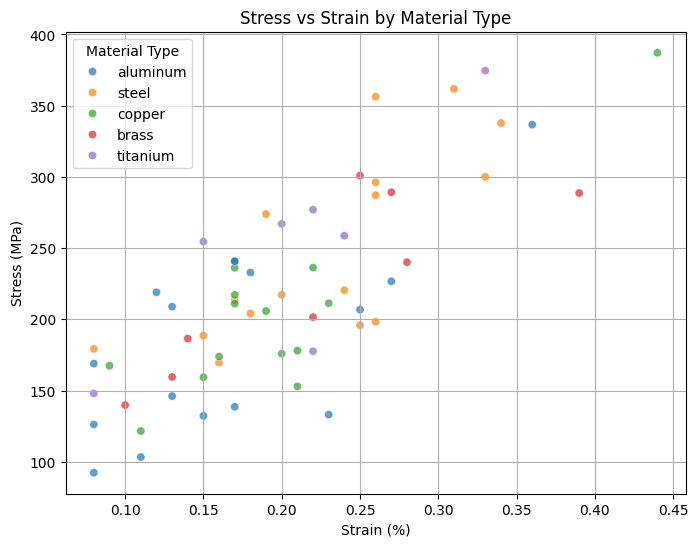


📁 Files exported:
 - material_strength_tests_cleaned.csv
 - material_strength_summary.csv

🎯 All tasks completed successfully!


In [1]:
# ================================================
# 📘 MATERIAL STRENGTH TEST ANALYSIS PIPELINE
# ================================================
# This script performs:
# 1. Data loading and preview
# 2. Data cleaning (duplicates, missing values, inconsistent text)
# 3. Summary computations
# 4. Correlation and visualization
# 5. Exporting cleaned data and summaries
# ================================================

# --- STEP 1: IMPORT LIBRARIES ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- STEP 2: LOAD AND PREVIEW DATASET ---
# Upload file in Colab if not in same directory
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv("/content/material_strength_tests.csv")

print("✅ Data loaded successfully!\n")
print("🔹 First 5 rows:")
display(df.head())

print("\n🔹 Dataset info:")
print(df.info())

print("\n🔹 Basic statistics:")
display(df.describe())

# --- STEP 3: DATA QUALITY CHECKS ---
print("\n🔹 Checking for duplicates:")
duplicates = df.duplicated().sum()
print(f"Found {duplicates} duplicate rows.")

print("\n🔹 Checking for missing values:")
display(df.isnull().sum())

print("\n🔹 Checking inconsistent text in Material_Type:")
print(df['Material_Type'].unique())

# --- STEP 4: DATA CLEANING ---
# 4.1 Remove duplicates
df.drop_duplicates(inplace=True)

# 4.2 Standardize text columns (example: Material_Type)
df['Material_Type'] = df['Material_Type'].str.strip().str.lower().str.replace(' ', '_')

# 4.3 Handle missing values (simple fill or drop)
# You can adjust this based on your case
df['Stress_MPa'].fillna(df['Stress_MPa'].mean(), inplace=True)
df['Strain_%'].fillna(df['Strain_%'].mean(), inplace=True)
df.dropna(subset=['Material_Type', 'Failure'], inplace=True)

print("\n✅ Data cleaned successfully!")

# --- STEP 5: COMPUTE AVERAGE STRESS AND STRAIN BY MATERIAL TYPE ---
avg_summary = df.groupby('Material_Type')[['Stress_MPa', 'Strain_%']].mean().reset_index()
print("\n🔹 Average Stress and Strain by Material Type:")
display(avg_summary)

# --- STEP 6: CORRELATION BETWEEN TEMPERATURE AND FAILURE ---
# Convert 'Failure' to numeric if needed (e.g., Yes/No → 1/0)
if df['Failure'].dtype == 'object':
    df['Failure'] = df['Failure'].str.lower().map({'yes': 1, 'no': 0})

correlation = df[['Temperature_C', 'Failure']].corr().iloc[0, 1]
print(f"\n🔹 Correlation between Temperature and Failure: {correlation:.3f}")
if correlation > 0:
    print("👉 Higher temperatures tend to increase failure probability.")
elif correlation < 0:
    print("👉 Higher temperatures tend to decrease failure probability.")
else:
    print("👉 No significant correlation found.")

# --- STEP 7: VISUALIZATION: STRESS VS STRAIN ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Strain_%', y='Stress_MPa', hue='Material_Type', alpha=0.7)
plt.title('Stress vs Strain by Material Type')
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.legend(title='Material Type')
plt.grid(True)
plt.show()

# --- STEP 8: EXPORT CLEANED DATA AND SUMMARY ---
df.to_csv("material_strength_tests_cleaned.csv", index=False)
avg_summary.to_csv("material_strength_summary.csv", index=False)

print("\n📁 Files exported:")
print(" - material_strength_tests_cleaned.csv")
print(" - material_strength_summary.csv")

# --- OPTIONAL: DOWNLOAD FILES IN COLAB ---
# from google.colab import files
# files.download("material_strength_tests_cleaned.csv")
# files.download("material_strength_summary.csv")

print("\n🎯 All tasks completed successfully!")
